# Curtain Parallel Potential Model
Here I explore the minimum parallel electric potential necessary to lower the mirror point of an electron from 100 km in the SAA (just trapped), to AC6's altitude in the bounce loss cone. 

Further, we assume this potential is at the equator, so it will modify the electron's equatorial pitch angle.

We will first pick a curtain observation and use IRBEM to find the minimum altitude and pitch angle change those electrons experienced such that they were observed by AC6 for a prolonged period.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.interpolate #.interp1d

import IRBEM
Re_km = 6_371

In [6]:
# t_0 = datetime(2015, 8, 27, 23, 4, 44, 500000)
t_0 = datetime(2017, 2, 2, 9, 36, 10, 900000)

### Load catalog file to look up AC6 location

In [7]:
cat_path = '/home/mike/research/ac6_curtains/data/catalogs/AC6_curtains_sorted_v8.txt'
cat = pd.read_csv(cat_path, index_col=0)
cat.index = pd.to_datetime(cat.index)
cat.head()

,dos1rate,peak_std,Lm_OPQ,MLT_OPQ,lat,lon,alt,Dist_In_Track,Lag_In_Track,Dist_Total,Loss_Cone_Type,flag,AE,time_cc,space_cc,time_spatial_A,time_spatial_B,peak_width_A,peak_width_B
dateTime,,,,,,,,,,,,,,,,,,,
2014-12-19 11:45:30.500000,290.002,2.840199,6.66789,10.71360,62.7607,-35.6930,662.260,461.176,61.2438,461.422,0.0,4.0,51.0,0.094868,0.870388,2014-12-19 11:44:29.256200,2014-12-19 11:45:30.500000,NaN,0.618749
2014-12-19 18:17:11.099999,340.002,14.832431,7.24842,7.98180,63.5059,-134.1340,663.739,463.721,61.5946,463.972,1.0,0.0,405.0,0.288474,0.892241,2014-12-19 18:16:09.505399,2014-12-19 18:17:11.099999,NaN,0.553333
2014-12-19 18:17:12.300000,340.002,11.704743,7.27972,7.97519,63.5759,-134.1890,663.824,463.718,61.5946,463.968,1.0,0.0,405.0,0.090012,0.895632,2014-12-19 18:16:10.705400,2014-12-19 18:17:12.300000,NaN,0.486890
2014-12-19 21:33:52.899999,640.003,14.352735,6.97210,7.45659,70.3503,170.0450,670.690,464.995,61.7903,465.247,1.0,20.0,99.0,0.536131,0.841011,2014-12-19 21:33:52.899999,2014-12-19 21:34:54.690299,0.565442,0.957143
2015-03-26 07:31:44.500000,170.001,1.455209,7.08831,10.39770,69.2889,21.2179,632.797,243.682,32.2168,243.716,1.0,0.0,201.0,0.261325,0.888005,2015-03-26 07:31:12.283200,2015-03-26 07:31:44.500000,0.057192,0.620818


In [8]:
curtain_obs_params = cat.loc[t_0]
curtain_obs_params

dos1rate                             1100.01
peak_std                             7.82797
Lm_OPQ                                 5.637
MLT_OPQ                              10.2041
lat                                  64.1108
lon                                  -10.597
alt                                  636.864
Dist_In_Track                        65.2286
Lag_In_Track                         8.63173
Dist_Total                           65.2867
Loss_Cone_Type                             2
flag                                       0
AE                                       271
time_cc                             0.854163
space_cc                            0.948282
time_spatial_A    2017-02-02 09:36:02.268270
time_spatial_B    2017-02-02 09:36:10.900000
peak_width_A                        0.711449
peak_width_B                        0.434247
Name: 2017-02-02 09:36:10.900000, dtype: object

From a single spacecraft this looks like two superposed microbursts
![image](20150827_blc_curtain_example.png)

### BLC Sanity Check
Southern Hemisphere Mirror Point For Locally Mirroring Electrons at AC6 

In [9]:
model = IRBEM.MagFields(kext='OPQ77')
X = {'dateTime':t_0, 'x1':cat.loc[t_0, 'alt'], 'x2':cat.loc[t_0, 'lat'], 'x3':cat.loc[t_0, 'lon']}

try:
    model.mirror_point_altitude(X, None)
    print(model.mirrorAlt)
except ValueError as err: 
    if str(err) == 'Mirror point below the ground!':
        print(err)
    else:
        raise

34.92992623789637


Looks like the mirror point in the southern hemisphere is below the ground - I am very confident that these electrons must have been lost within one bounce.

### Mirror points for trapped particles
Trace the field line connected to AC6 and find the mirror point altitude above AC6 of bareley trapped electrons - defined as electrons with a 100 km mirror point altitude in the SAA.

In [10]:
output_dictionary = model.trace_field_line(X, None) # Trace the magnetic field line.
field_line_dict = {'x':output_dictionary['POSIT'][:,0], 'y':output_dictionary['POSIT'][:,1], 
              'z':output_dictionary['POSIT'][:,2], 'blocal':output_dictionary['blocal'],
             'alt':Re_km*(np.linalg.norm(output_dictionary['POSIT'], axis=1)-1)}
field_line_df = pd.DataFrame(data=field_line_dict)
interp_index = np.linspace(0, len(output_dictionary['POSIT'][:,0])-1, num=10000)

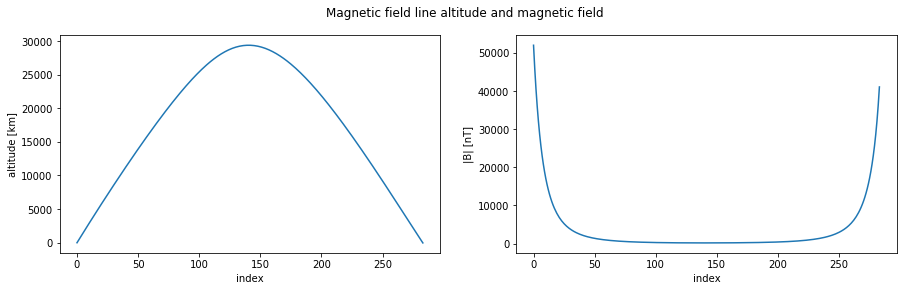

In [11]:
_ , ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(field_line_df.alt); ax[0].set(xlabel='index', ylabel='altitude [km]')
ax[1].plot(field_line_df.blocal); ax[1].set(xlabel='index', ylabel='|B| [nT]')
plt.suptitle('Magnetic field line altitude and magnetic field');

Interpolate the field line values

In [12]:
def interp_df(df, new_index):
    """
    Return a new DataFrame with all columns values interpolated
    to the new_index values.
    """
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col, right=np.nan)

    return df_out

field_line_interp = interp_df(field_line_df, interp_index)

### Find the magnetic field strength at 100 km in the southern hemisphere and estimate by how much the electron's mirror point must have lowered

In [13]:
southern_mp_trapped = field_line_interp[field_line_interp.alt > 100].iloc[-1]
southern_mp_trapped

x             0.333480
y             0.237432
z            -0.930309
blocal    38697.441657
alt         104.818996
Name: 282.5188518851885, dtype: float64

Now use the local b field at 100 km altitude in the SAA to find the altitude in the northern hemisphere that has the same magnetic field strength

In [14]:
northern_mp_trapped = field_line_interp[field_line_interp.blocal < southern_mp_trapped.blocal].iloc[0]
northern_mp_trapped

x             0.482341
y            -0.089767
z             0.996749
blocal    38668.424689
alt         706.997668
Name: 2.405740574057406, dtype: float64

Now find out the difference in altitude - by how much the electron's mirror point needed to lower in one bounce and be observed by AC6

In [15]:
ac6_blocal = field_line_interp[field_line_interp.alt > curtain_obs_params.alt].iloc[0].blocal
print(f"The electron's mirror point must have decreased by at least "
      f"{round(northern_mp_trapped.alt - curtain_obs_params.alt)} km "
      f"into a {round(ac6_blocal - northern_mp_trapped.blocal)} nT stronger field strength")

The electron's mirror point must have decreased by at least 70.0 km into a 1032.0 nT stronger field strength


### Estimate the change in pitch angle from the trapped to the precipitating particle.
First find the equatorial magnetic field strength

In [16]:
b_equator = model.find_magequator(X, None)['bmin']
print(f'Equatorial magnetic field strength = {round(b_equator)} nT')

Equatorial magnetic field strength = 164 nT


The equatorial pitch angle is defined as 

$$
\alpha_{eq} = sin^{-1} \bigg( \sqrt{ \frac{ B_{eq} } { B_m } } \bigg)
$$

In [17]:
alpha_initial = np.arcsin(np.sqrt(b_equator/southern_mp_trapped['blocal']))
alpha_final = np.arcsin(np.sqrt(b_equator/ac6_blocal))
d_alpha = alpha_initial - alpha_final

print(f"Initial pitch angle = {round(np.rad2deg(alpha_initial), 2)} degrees")
print(f"Final pitch angle = {round(np.rad2deg(alpha_final), 2)} degrees")
print(f"Pitch angle change = {round(np.rad2deg(d_alpha), 2)} degrees")

Initial pitch angle = 3.73 degrees
Final pitch angle = 3.68 degrees
Pitch angle change = 0.05 degrees


Now find the parallel potential (I worked out the math on paper).

In [18]:
potential = 35E3 * np.cos(alpha_initial) * ((np.tan(alpha_initial)/np.tan(alpha_final))**2 - 1)
print(f'Minimum electric potential is {round(potential)} Volts')

Minimum electric potential is 909.0 Volts


Paul's idea to use adiabatic invariants. Kinetic energy of a prticle at the mirror point is $W=\mu B_0$ with no potential. Then you accelerate the particle with a potential $\Phi$ and the particle will keep going until it reaches a new mirror point at $\mu B_1 = \mu B_0 + q \Phi$. Then the potential is just

$$
q\Phi = \frac{W}{B_0} (B_1 - B_0),
$$ where $W$ is the electron's kinetic energy.

In [19]:
35E3*(ac6_blocal - northern_mp_trapped.blocal)/northern_mp_trapped.blocal

934.2940523505823

# Misc

### 35 keV electron bounce period in the area near the BLC
Calculate the bounce period for locally mirroring, 35 keV electrons near the BLC region. This is only an appriximation to see if the bounce period is anywhere near the 4-8 second AC6 in-track separations when these curtains were observed.

In [20]:
X = {'dateTime':t_0, 'x1':cat.loc[t_0, 'alt'], 'x2':cat.loc[t_0, 'lat'], 'x3':-30}
model.bounce_period(X, None, 35)
print(f'35 keV electron bounce period is {round(model.Tb, 2)} seconds')

35 keV electron bounce period is 2.2 seconds


/home/mike/research/irbem-code/python/IRBEM.py:923: RuntimeWarning: invalid value encountered in sqrt
  vparalel = lambda Ek, Bm, B, Erest = 511:c*beta(Ek, Erest)*np.sqrt(1 - np.abs(B/Bm))
